In [1]:
import json
from pathlib import Path
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.blocks.stats import BlockStats
from src import Block
from src import PositionalString
from tqdm import tqdm; tqdm.pandas()

In [2]:
# INPUTS
path_max_blocks_stats=Path("out/smk_max_blocks.tsv")
dir_max_blocks=Path("out/blocks/")

In [3]:
df = pd.read_csv(path_max_blocks_stats,sep="\t", index_col=False, header=0)
df["t [min]"] = df["t"]/60

# time in minutes
vec_bins=[0,1,10,15,30,45,60,120,180,300,720,1440,10_000] # bins in minutes
label_bins = [f"<{bin}" for bin in vec_bins[1:]]
df["t_[min]"]=pd.cut(df["t [min]"], bins=vec_bins, labels=label_bins)

In [4]:
# 1. size_msa = n_rows x n_cols, n_rows: n_unique_seqs in the table
df["max_blocks/size_msa"] = df.apply(lambda row: round(100*row["n_max_blocks"]/(row["n_unique_seqs"]*row["n_cols"]),2),axis=1)

In [5]:
df.describe()

,n_seqs,n_unique_seqs,n_cols,n_max_blocks,t,t [min],max_blocks/size_msa
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,71.520000,11.600000,595.140000,192.540000,4548.667232,75.811121,2.05740
std,97.201083,15.982133,644.152917,350.623655,11142.976704,185.716278,2.22076
min,2.000000,2.000000,38.000000,2.000000,0.367273,0.006121,0.09000
25%,6.000000,2.250000,186.750000,4.000000,24.471607,0.407860,0.78000
50%,20.000000,3.500000,447.000000,15.000000,278.668979,4.644483,1.73000
75%,108.750000,13.250000,889.500000,144.250000,1766.758505,29.445975,2.62750
max,307.000000,64.000000,4098.000000,1484.000000,50728.152704,845.469212,13.97000


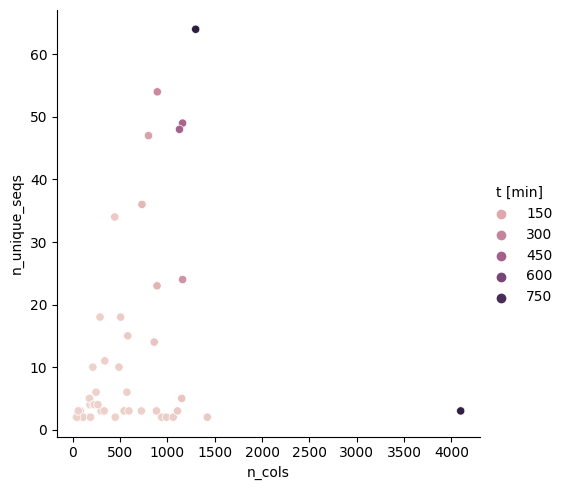

In [6]:
sns.relplot(df,
    x="n_cols",
    y="n_unique_seqs",
    hue="t [min]",
)

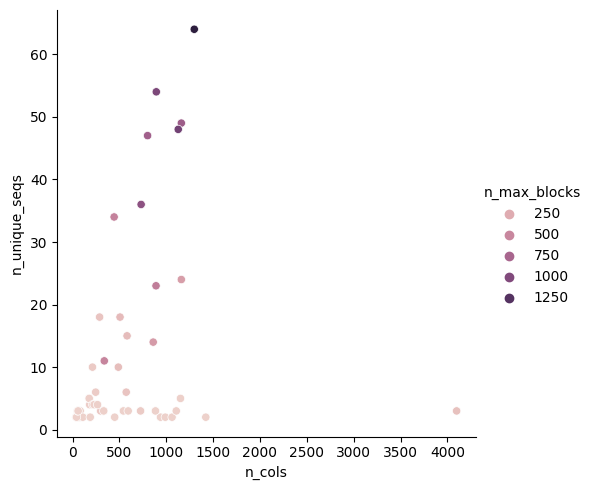

In [7]:
sns.relplot(df,
    x="n_cols",
    y="n_unique_seqs",
    hue="n_max_blocks",
)

# Analysis 

In [8]:
block_stats=BlockStats()
def path_block_from_msa(path_msa):
    name_msa = Path(path_msa).stem
    return dir_max_blocks.joinpath(f"{name_msa}.json")

def gene_or_intergenic(path_msa):
    if Path(path_msa).stem.startswith("GC"):
        return "genic"
    else:
        return "intergenic"
df_stats=df.progress_apply(lambda row: block_stats(path_blocks=path_block_from_msa(row["path_msa"])),axis=1 )

100%|██████████| 50/50 [01:25<00:00,  1.70s/it]


In [9]:
pd.concat([df,  pd.DataFrame(list(df_stats))],axis=1)

,timestamp,path_msa,n_seqs,n_unique_seqs,n_cols,n_max_blocks,t,t [min],t_[min],max_blocks/size_msa,number_of_blocks,blocks_with_overlap,inter_between_blocks
0,Sat Oct 29 15:55:34 2022,/data/msas/msas/Cluster_13942.fa,19,2,38,2,0.367273,0.006121,<1,2.63,2,0,0
1,Sat Oct 29 15:55:35 2022,/data/msas/msas/Cluster_12332.fa,19,2,57,2,0.793138,0.013219,<1,1.75,2,0,0
2,Sat Oct 29 15:55:35 2022,/data/msas/msas/Cluster_11869.fa,4,2,66,4,1.171890,0.019531,<1,3.03,4,0,0
3,Sat Oct 29 15:55:35 2022,/data/msas/msas/Cluster_10907.fa,11,2,78,2,1.594922,0.026582,<1,1.28,2,0,0
4,Sat Oct 29 15:55:37 2022,/data/msas/msas/Cluster_10644.fa,155,3,82,5,3.114183,0.051903,<1,2.03,5,3,6
5,Sat Oct 29 15:55:46 2022,/data/msas/msas/GC00009462.fa,2,2,186,2,12.642137,0.210702,<1,0.54,2,0,0
6,Sat Oct 29 15:55:56 2022,/data/msas/msas/GC00006654.fa,9,4,183,28,22.278561,0.371309,<1,3.83,28,23,71
7,Sat Oct 29 15:55:58 2022,/data/msas/msas/GC00003676.fa,148,5,177,14,24.066478,0.401108,<1,1.58,14,13,100
8,Sat Oct 29 15:56:00 2022,/data/msas/msas/Cluster_6090.fa,99,5,178,22,25.686993,0.428117,<1,2.47,22,20,162
9,Sat Oct 29 15:56:00 2022,/data/msas/msas/Cluster_9042.fa,2,2,110,3,3.035759,0.050596,<1,1.36,3,0,0


In [1]:
from src.blocks.block_decomposition import block_decomposition
from src.blocks.block import Block

In [3]:
b1 = Block([1,2,3],1,5,"ACGTT")
b2 = Block([2,3],1,3,"ACG")
block_decomposition(b1,b2)

Condicion1


[Block(K=[2, 3], i=1, j=3, label='ACG'),
 Block(K=[1, 2, 3], i=4, j=5, label='TT')]

In [2]:
b1 = Block([2,3],1,5,"ACGTT")
b2 = Block([1,2,3],2,4,"CGT")

block_decomposition(b1,b2)

Condicion2


[Block(K=[2, 3], i=1, j=1, label='A'),
 Block(K=[1, 2, 3], i=2, j=4, label='CGT'),
 Block(K=[2, 3], i=5, j=5, label='T')]

In [6]:
b1 = Block([1,2],1,5,"ACGTT")
b2 = Block([1,2,3],4,5,"TT")
block_decomposition(b1,b2)

Condicion3


[Block(K=[1, 2], i=1, j=3, label='ACG'),
 Block(K=[1, 2, 3], i=4, j=5, label='TT')]

In [7]:
b1 = Block([1,2],1,4,"ACGT")
b2 = Block([2,3],3,5,"GTT")
block_decomposition(b1,b2)

Condicion4


[Block(K=[1, 2], i=1, j=2, label='AC'),
 Block(K=[2, 3], i=3, j=5, label='GTT'),
 Block(K=[1, 2], i=1, j=4, label='ACGT'),
 Block(K=[2, 3], i=5, j=5, label='T')]